In [54]:
# Import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


data = pd.read_csv(
    "https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv"
)

In [55]:
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1565930130,20141104T000000,4,3.25,3760,4675,2.0,0,0,3,...,2740,1020,2007,0,98038,47.3862,-122.048,3280,4033,429900.0
1,3279000420,20150115T000000,3,1.75,1460,7800,1.0,0,0,2,...,1040,420,1979,0,98023,47.3035,-122.382,1310,7865,233000.0
2,194000575,20141014T000000,4,1.00,1340,5800,1.5,0,2,3,...,1340,0,1914,0,98116,47.5658,-122.389,1900,5800,455000.0
3,2115510160,20141208T000000,3,1.75,1440,8050,1.0,0,0,3,...,1440,0,1985,0,98023,47.3187,-122.390,1790,7488,258950.0
4,7522500005,20140815T000000,2,1.50,1780,4750,1.0,0,0,4,...,1080,700,1947,0,98117,47.6859,-122.395,1690,5962,555000.0


In [56]:
columns = data.columns.tolist()


def display_columns(columns):
    for column in columns:
        print(column)


print(f"COLUMNS: \n---------------")
display_columns(columns)
print(f"---------------\n")

COLUMNS: 
---------------
id
date
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
zipcode
lat
long
sqft_living15
sqft_lot15
price
---------------



In [57]:
data_types = data.dtypes
print(f"DATA TYPES: \n---------------\n {data_types}")
print(f"---------------\n")

DATA TYPES: 
---------------
 id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price            float64
dtype: object
---------------



In [58]:
missing_data_summary = data.isnull().sum()
print(f"MISSING DATA: \n---------------\n {missing_data_summary}")
print(f"---------------\n")

MISSING DATA: 
---------------
 id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64
---------------



In [59]:
# feature_columns = [
#     "bedrooms",
#     "bathrooms",
#     "sqft_living",
#     "sqft_lot",
#     "floors",
#     "waterfront",
#     "view",
#     "condition",
#     "grade",
#     "sqft_above",
#     "sqft_basement",
#     "yr_built",
#     "yr_renovated",
#     "lat",
#     "long",
#     "sqft_living15",
#     "sqft_lot15",
# ]

# # Create individual scatter plots for each feature vs. price
# for column in feature_columns:
#     plt.figure(figsize=(8, 4))
    
#     sns.scatterplot(data=data, x=column, y="price")
#     plt.title(f"Correlation between {column} and Price")
#     plt.xlabel(column)
#     plt.ylabel("Price")
#     plt.show()

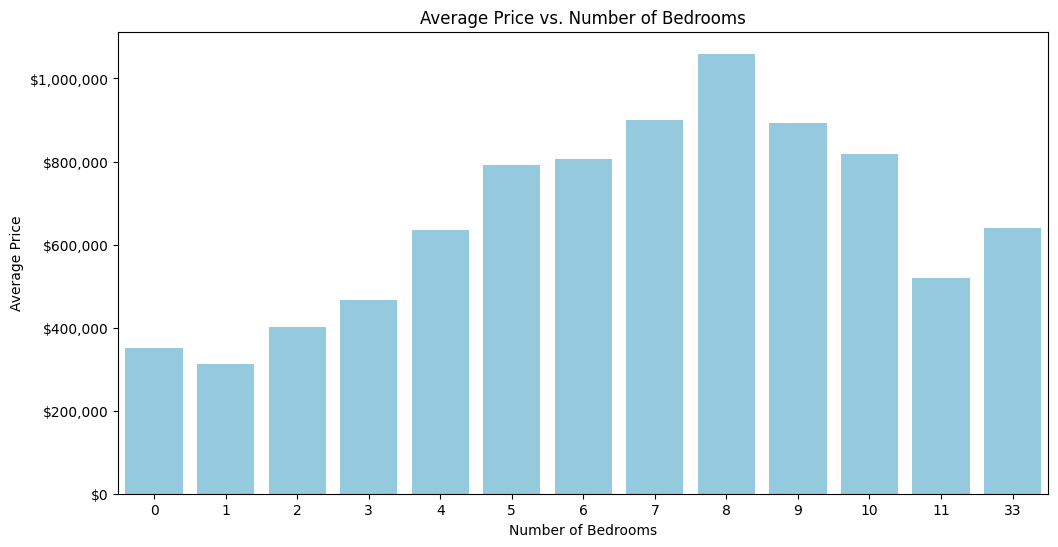

In [60]:
# Unique values of bedrooms
unique_bedrooms = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33]

# Calculate the average price for each unique number of bedrooms
avg_prices = []
for num_bedrooms in unique_bedrooms:
    avg_price = data[data["bedrooms"] == num_bedrooms]["price"].mean()
    avg_prices.append(avg_price)

# Create a bar plot with thicker bars and no gap between 11 and 33 bedrooms
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=unique_bedrooms, y=avg_prices, color="skyblue")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Average Price")
plt.title("Average Price vs. Number of Bedrooms")


# Format the y-axis labels with commas and a dollar sign
def price_formatter(x, pos):
    return f"${x:,.0f}"


ax.yaxis.set_major_formatter(FuncFormatter(price_formatter))

plt.show()

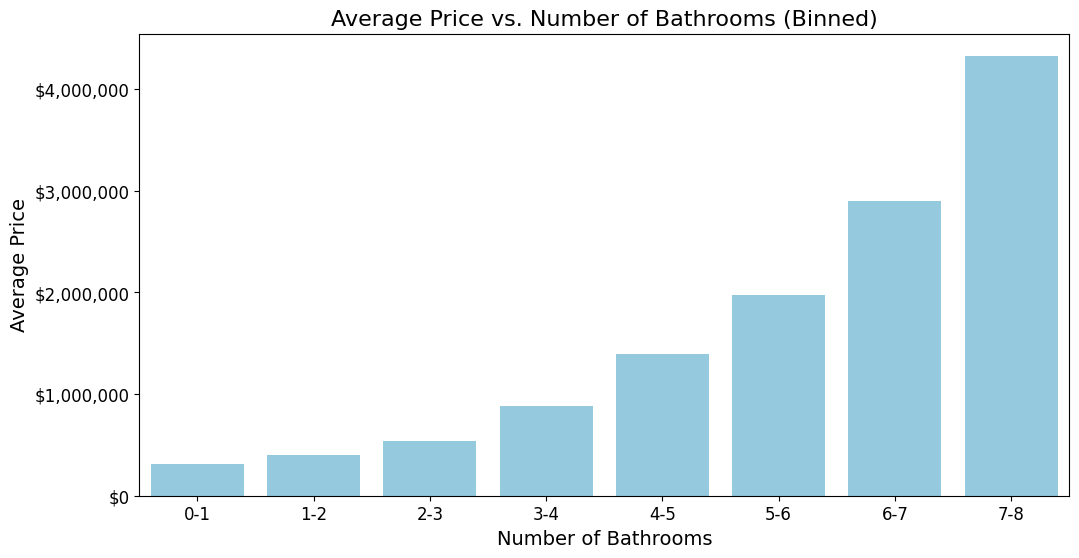

In [61]:
# Define bins for the bathrooms feature
bins = [0, 1, 2, 3, 4, 5, 6, 7, float("inf")]
labels = ["0-1", "1-2", "2-3", "3-4", "4-5", "5-6", "6-7", "7-8"]

# Bin the bathrooms feature
data["bathrooms_bin"] = pd.cut(data["bathrooms"], bins=bins, labels=labels, right=False)

# Calculate the average price for each bathroom bin
avg_prices = data.groupby("bathrooms_bin")["price"].mean()

# Create a bar plot for bathroom bins vs. average price
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=avg_prices.index, y=avg_prices.values, color="skyblue")
plt.xlabel("Number of Bathrooms", fontsize=14)
plt.ylabel("Average Price", fontsize=14)
plt.title("Average Price vs. Number of Bathrooms (Binned)", fontsize=16)


# Format the y-axis labels with commas and a dollar sign
def price_formatter(x, pos):
    return f"${x:,.0f}"


ax.yaxis.set_major_formatter(FuncFormatter(price_formatter))
# Increase font size for x-axis tick labels
plt.xticks(fontsize=12)

# Increase font size for y-axis tick labels
plt.yticks(fontsize=12)

plt.show()

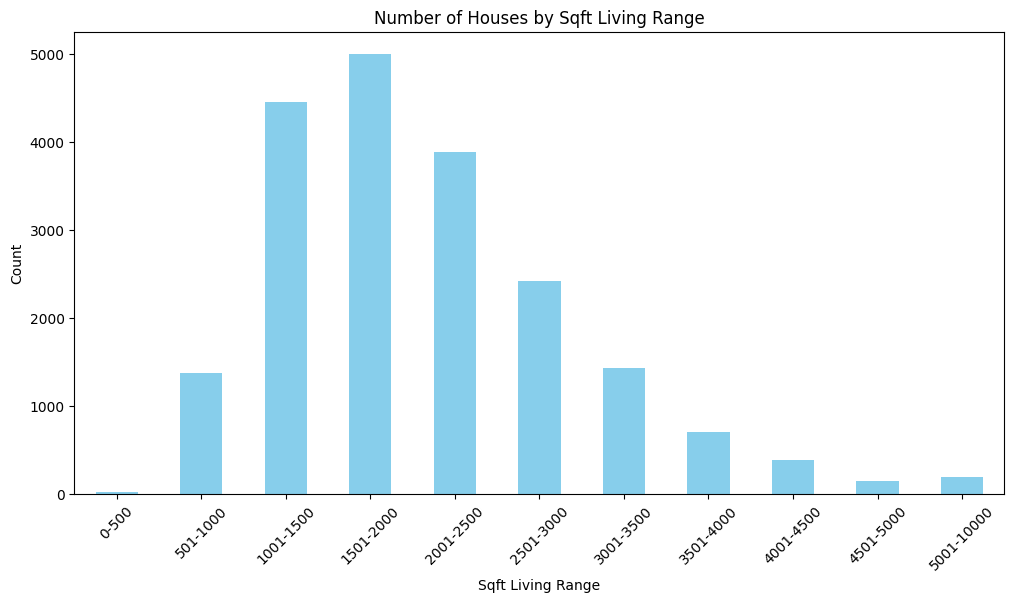

In [62]:
# Define bins for sqft_living
data = data[data["sqft_living"] <= 10000]
bins = [
    0,
    500,
    1000,
    1500,
    2000,
    2500,
    3000,
    3500,
    4000,
    4500,
    5000,
    float("inf"),
]
labels = [
    "0-500",
    "501-1000",
    "1001-1500",
    "1501-2000",
    "2001-2500",
    "2501-3000",
    "3001-3500",
    "3501-4000",
    "4001-4500",
    "4501-5000",
    "5001-10000",
  
]

# Bin the sqft_living values
data["sqft_living_bin"] = pd.cut(data["sqft_living"], bins=bins, labels=labels)

# Count the number of data points in each bin
bin_counts = data["sqft_living_bin"].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
bin_counts.plot(kind="bar", color="skyblue")
plt.xlabel("Sqft Living Range")
plt.ylabel("Count")
plt.title("Number of Houses by Sqft Living Range")
plt.xticks(rotation=45)
plt.show()

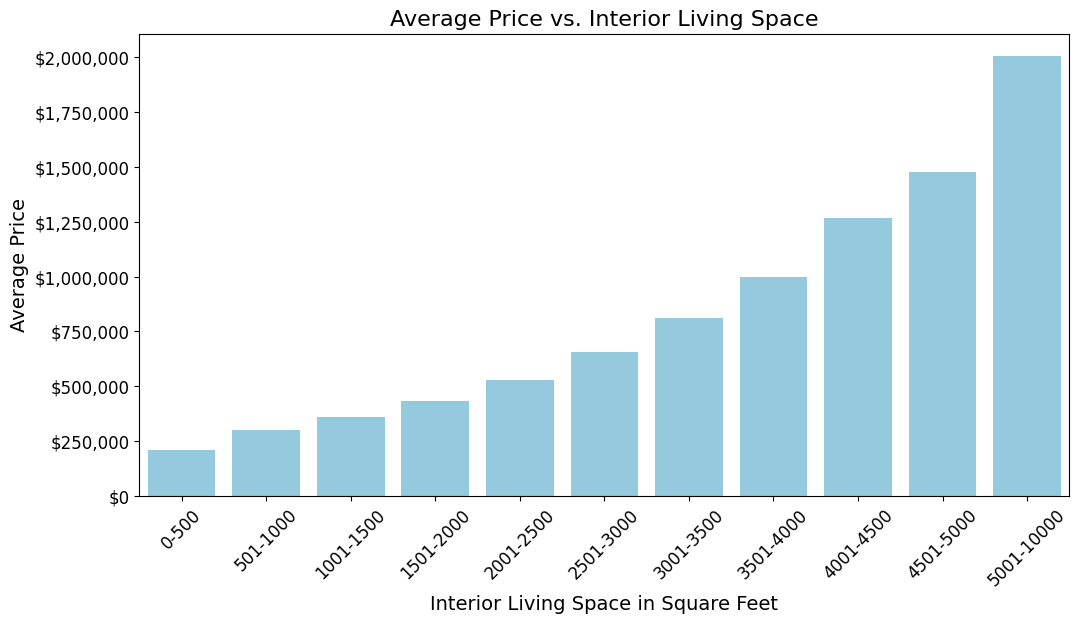

In [63]:
# Calculate the average price for each sqft_living bin
avg_prices = data.groupby("sqft_living_bin")["price"].mean()

# Create a bar plot for sqft_living bins vs. average price
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=avg_prices.index, y=avg_prices.values, color="skyblue")
plt.xlabel("Interior Living Space in Square Feet", fontsize=14)
plt.ylabel("Average Price", fontsize=14)
plt.title("Average Price vs. Interior Living Space", fontsize=16)


# Format the y-axis labels with commas and a dollar sign
def price_formatter(x, pos):
    return f"${x:,.0f}"


ax.yaxis.set_major_formatter(FuncFormatter(price_formatter))

plt.xticks(rotation=45)
# Increase font size for x-axis tick labels
plt.xticks(fontsize=12)

# Increase font size for y-axis tick labels
plt.yticks(fontsize=12)

plt.show()

In [64]:
data.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,1.999700e+04,19997.000000,19997.000000,19997.000000,1.999700e+04,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,19997.000000,1.999700e+04
mean,4.580094e+09,3.369805,2.115042,2078.413362,1.499894e+04,1.496299,0.007501,0.234485,3.409711,7.657049,1789.218283,289.195079,1971.103366,82.545132,98077.880582,47.559956,-122.213903,1986.049407,12738.268690,5.386654e+05
std,2.875133e+09,0.931390,0.767755,911.468571,3.964990e+04,0.540828,0.086286,0.766937,0.651918,1.174128,825.457340,439.912591,29.371548,397.442326,53.438919,0.138522,0.140648,684.686252,27039.500251,3.597907e+05
min,1.000102e+06,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.500000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.470600,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904950e+09,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571400,-122.230000,1840.000000,7621.000000,4.500000e+05
75%,7.309100e+09,4.000000,2.500000,2550.000000,1.070700e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678000,-122.124000,2360.000000,10087.000000,6.412000e+05
max,9.900000e+09,33.000000,7.750000,9890.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,6.885000e+06


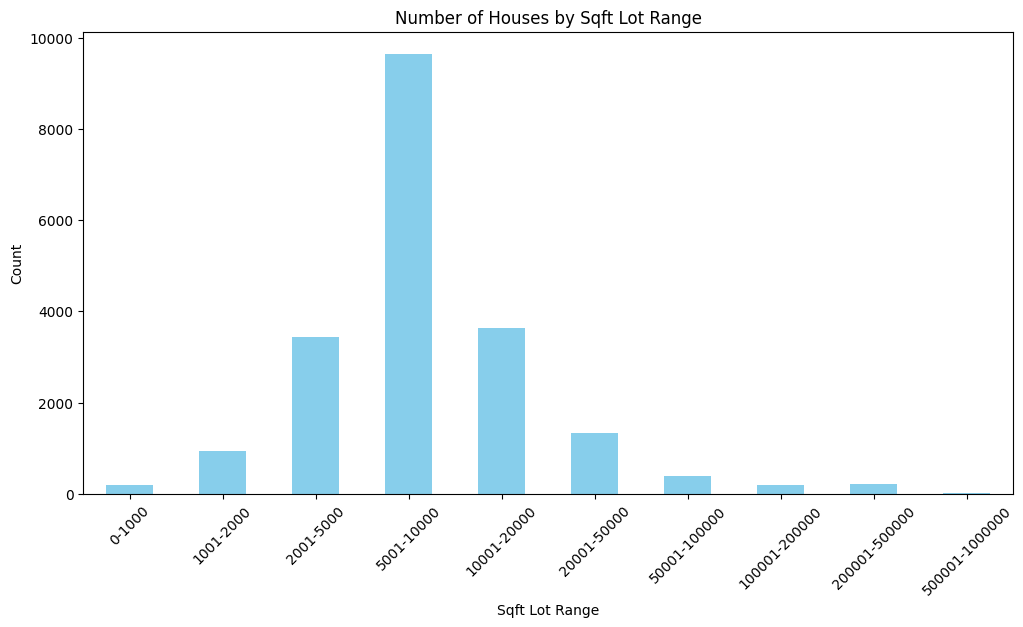

In [66]:
# Define bins for sqft_lot
bins = [
    0,
    1000,
    2000,
    5000,
    10000,
    20000,
    50000,
    100000,
    200000,
    500000,
  
    float("inf"),
]
labels = [
    "0-1000",
    "1001-2000",
    "2001-5000",
    "5001-10000",
    "10001-20000",
    "20001-50000",
    "50001-100000",
    "100001-200000",
    "200001-500000",
    "500001-1000000",
  
]

# Bin the sqft_lot values
data["sqft_lot_bin"] = pd.cut(data["sqft_lot"], bins=bins, labels=labels, right=False)

# Calculate the count of data points in each bin
bin_counts = data["sqft_lot_bin"].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
bin_counts.plot(kind="bar", color="skyblue")
plt.xlabel("Sqft Lot Range")
plt.ylabel("Count")
plt.title("Number of Houses by Sqft Lot Range")
plt.xticks(rotation=45)
plt.show()

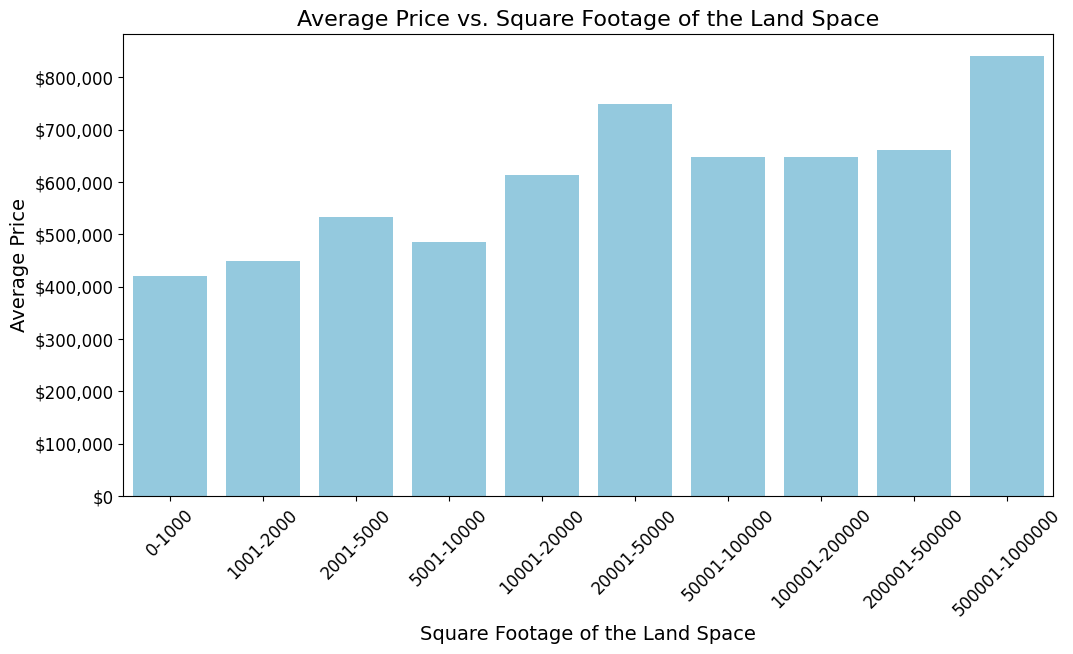

In [67]:
# Calculate the average price for each sqft_lot bin
avg_prices = data.groupby("sqft_lot_bin")["price"].mean()

# Create a bar plot for sqft_lot bins vs. average price
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=avg_prices.index, y=avg_prices.values, color="skyblue")
plt.xlabel("Square Footage of the Land Space", fontsize=14)
plt.ylabel("Average Price", fontsize=14)
plt.title("Average Price vs. Square Footage of the Land Space", fontsize=16)


# Format the y-axis labels with commas and a dollar sign
def price_formatter(x, pos):
    return f"${x:,.0f}"


ax.yaxis.set_major_formatter(FuncFormatter(price_formatter))

plt.xticks(rotation=45)
# Increase font size for x-axis tick labels
plt.xticks(fontsize=12)

# Increase font size for y-axis tick labels
plt.yticks(fontsize=12)

plt.show()

In [68]:
data['grade'].unique()

array([ 8,  7,  9,  6, 10, 11,  5, 12, 13,  4,  3,  1])

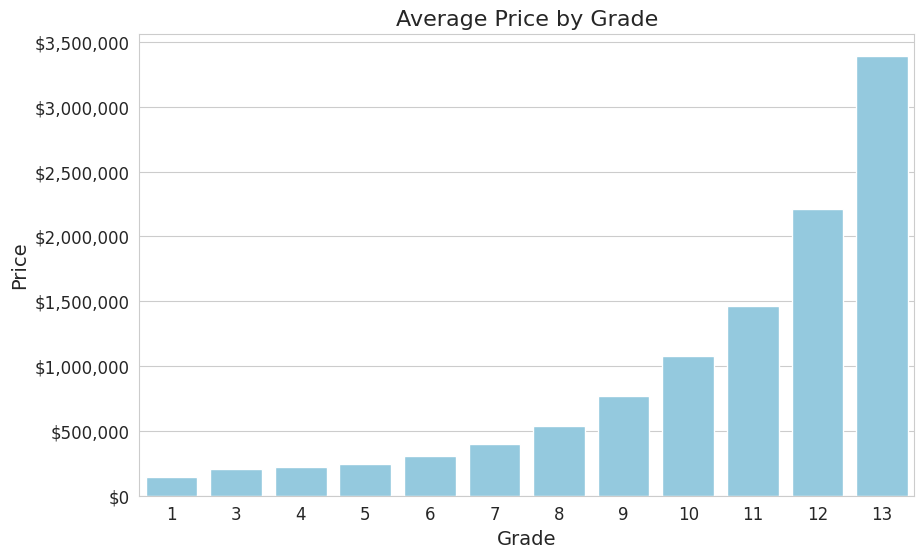

In [81]:
sns.set_style("whitegrid")

# Create a larger figure size to make the plot more readable
plt.figure(figsize=(10, 6))

# Generate the bar plot
ax = sns.barplot(
    data=data,
    x="grade",  # It's more efficient to refer directly to column names
    y="price",
    color="skyblue",
    errorbar=None,  # Remove the confidence interval to simplify the plot, if desired
    order=sorted(data["grade"].unique()),  # Optional: Order the bars meaningfully
)

# Enhance readability with larger labels, and add a title
plt.xlabel("Grade", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.title("Average Price by Grade", fontsize=16)

ax.yaxis.set_major_formatter(FuncFormatter(price_formatter))
# Optionally, add value labels on top of each bar for direct readability


plt.xticks(fontsize=12)

# Increase font size for y-axis tick labels
plt.yticks(fontsize=12)


# Show the plot
plt.show()